# Part 1: retrieving the data

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.style.use('seaborn-pastel')

csv = pd.read_csv("../data/SFPD_data.csv")
df = pd.DataFrame(csv)

df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821015200
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160


# Part 2: working with the Data
## 2.1 Types of crime and their popularity over time
* What is the total number of incidents in the CSV file?
* Create a set() of all the categories of crime in the dataset. How many are there?
* Now count the number of occurrences of each category in the dataset. What is the most commonly occurring category of crime? What is the least frequently occurring?
* Create a histogram over crime occurrences.

In [2]:
from IPython.display import display

print "There are %d total incidents" % len(df)

category_set = set(df["Category"])
print "There are %d categories" % len(category_set) 

# series:
# cat_occurrences = df["Category"].value_counts().sort_values()

# dataframe:
# groupby(): df -> groupbyobject
# count(): groupbydf -> series
# reset_index(): series -> df
df_category_occurrences = df.groupby("Category")["Category"].count().reset_index(name="Occurrences").sort_values(by="Occurrences", ascending=True)

print "Most common crime:"
display(df_category_occurrences.tail(1))

print "Least common crime:"
display(df_category_occurrences.head(1))

There are 2023865 total incidents
There are 39 categories
Most common crime:


,Category,Occurrences
16,LARCENY/THEFT,422170


Least common crime:


,Category,Occurrences
33,TREA,13


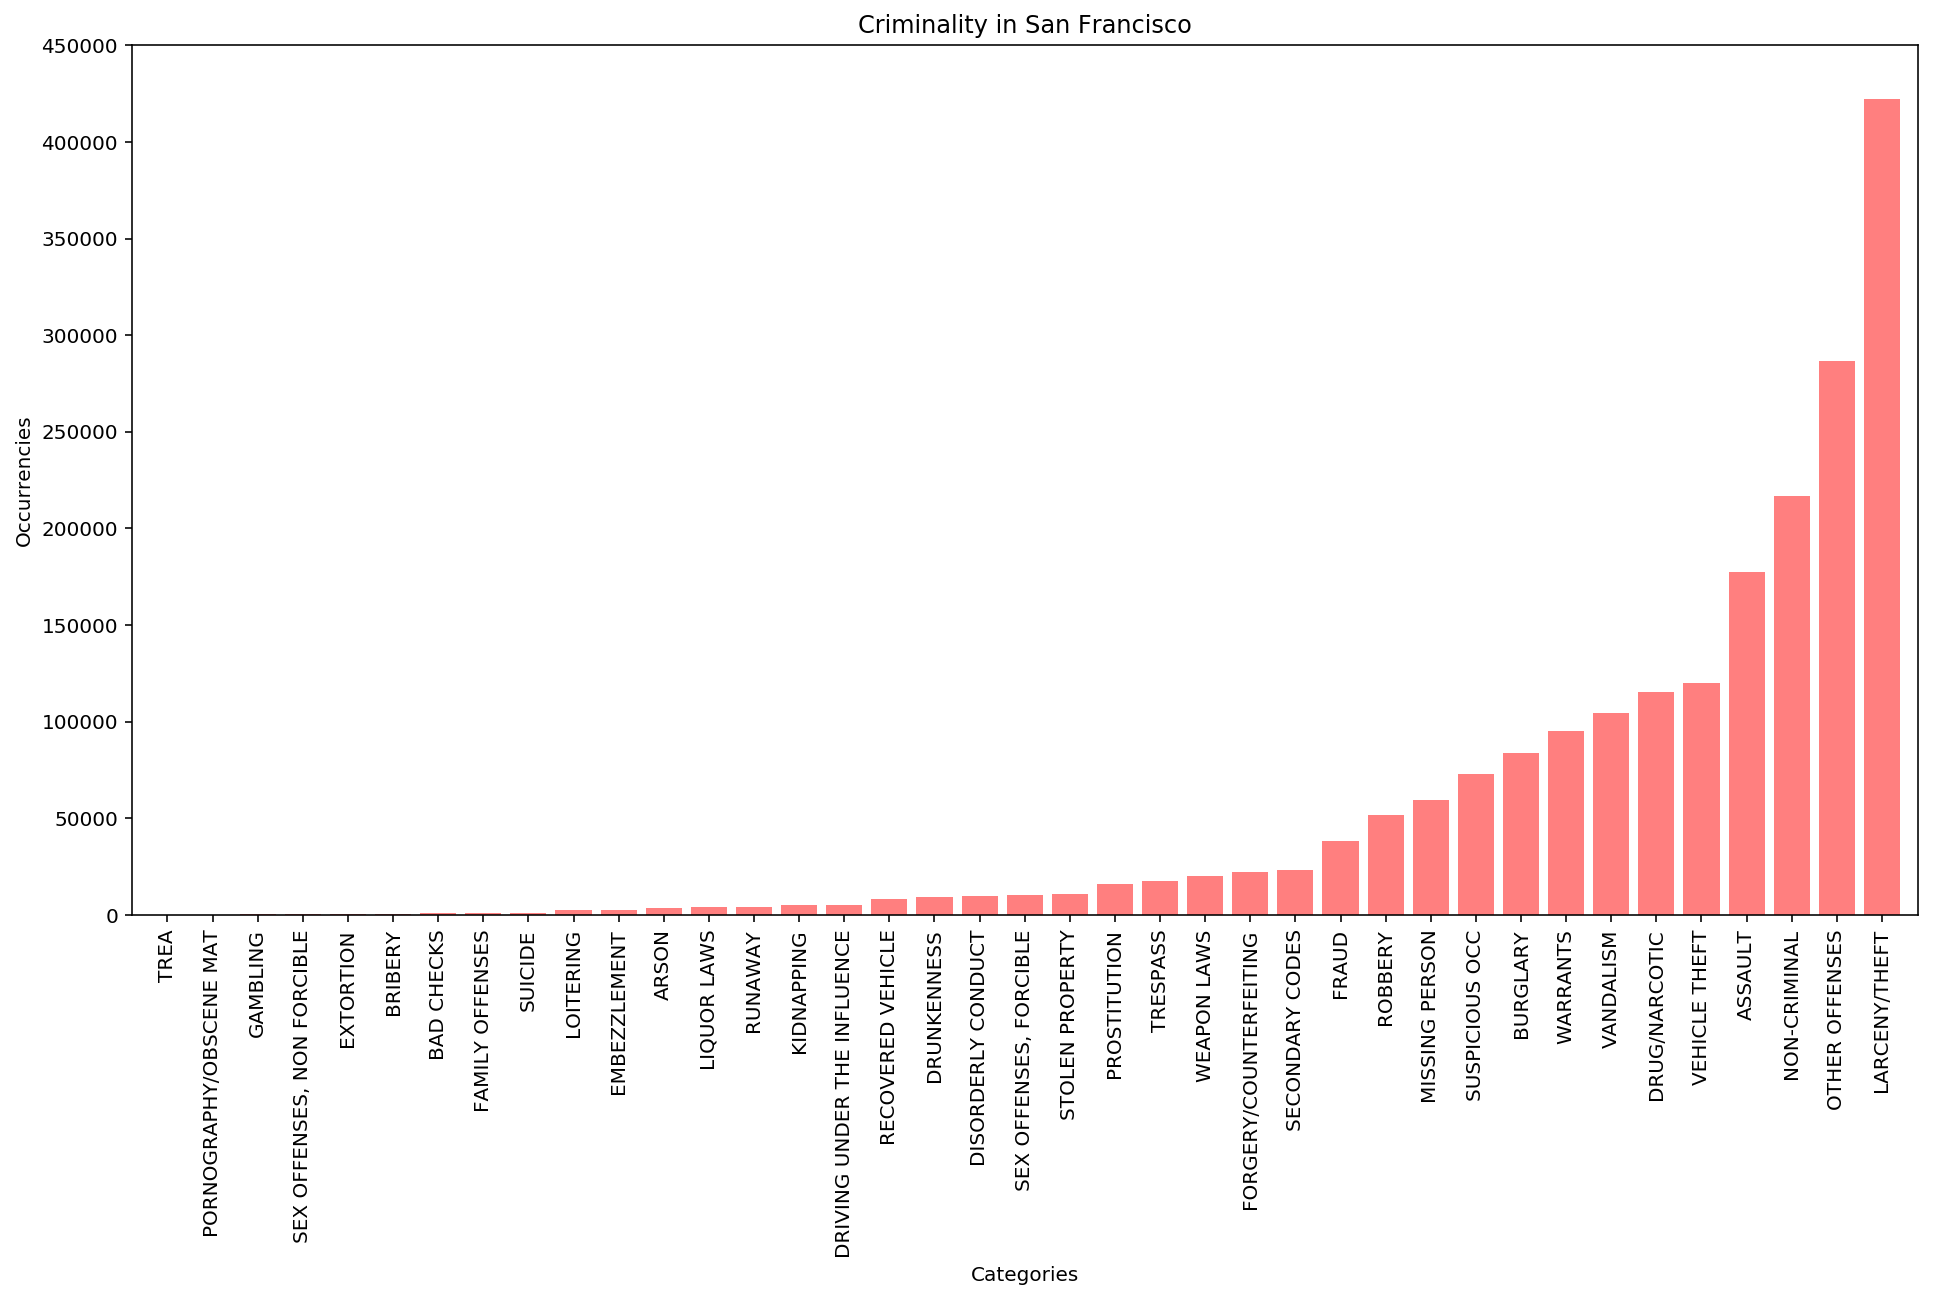

In [3]:
categories_names = list(df_category_occurrences["Category"])
y = list(df_category_occurrences["Occurrences"])
x = np.arange(len(categories_names))

plt.figure(figsize=(16,8))
plt.bar(x,y,alpha=.5,color='red',align='center')
plt.xticks(x,categories_names,rotation='vertical')
plt.title("Criminality in San Francisco")
plt.xlabel('Categories')
plt.ylabel("Occurrencies")
plt.margins(0.01,0)
plt.ylim(0,450000)
plt.show()

Now it's time to explore how the crime statistics change over time. To start off easily, let's count the number of crimes per year for the years 2003-2016 (the full years in the database). 
* What's the average number of crimes per year?

In [4]:
def get_year(date):
    return int(date.split("/")[2])

df['Year'] = df['Date'].apply(lambda x: get_year(x))
df_year_occurrences = df.groupby('Year')['Year'].count().reset_index(name='Count')
print "Average number of crimes per year: %d" % df_year_occurrences["Count"].mean()

Average number of crimes per year: 134924


* Now create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2016.

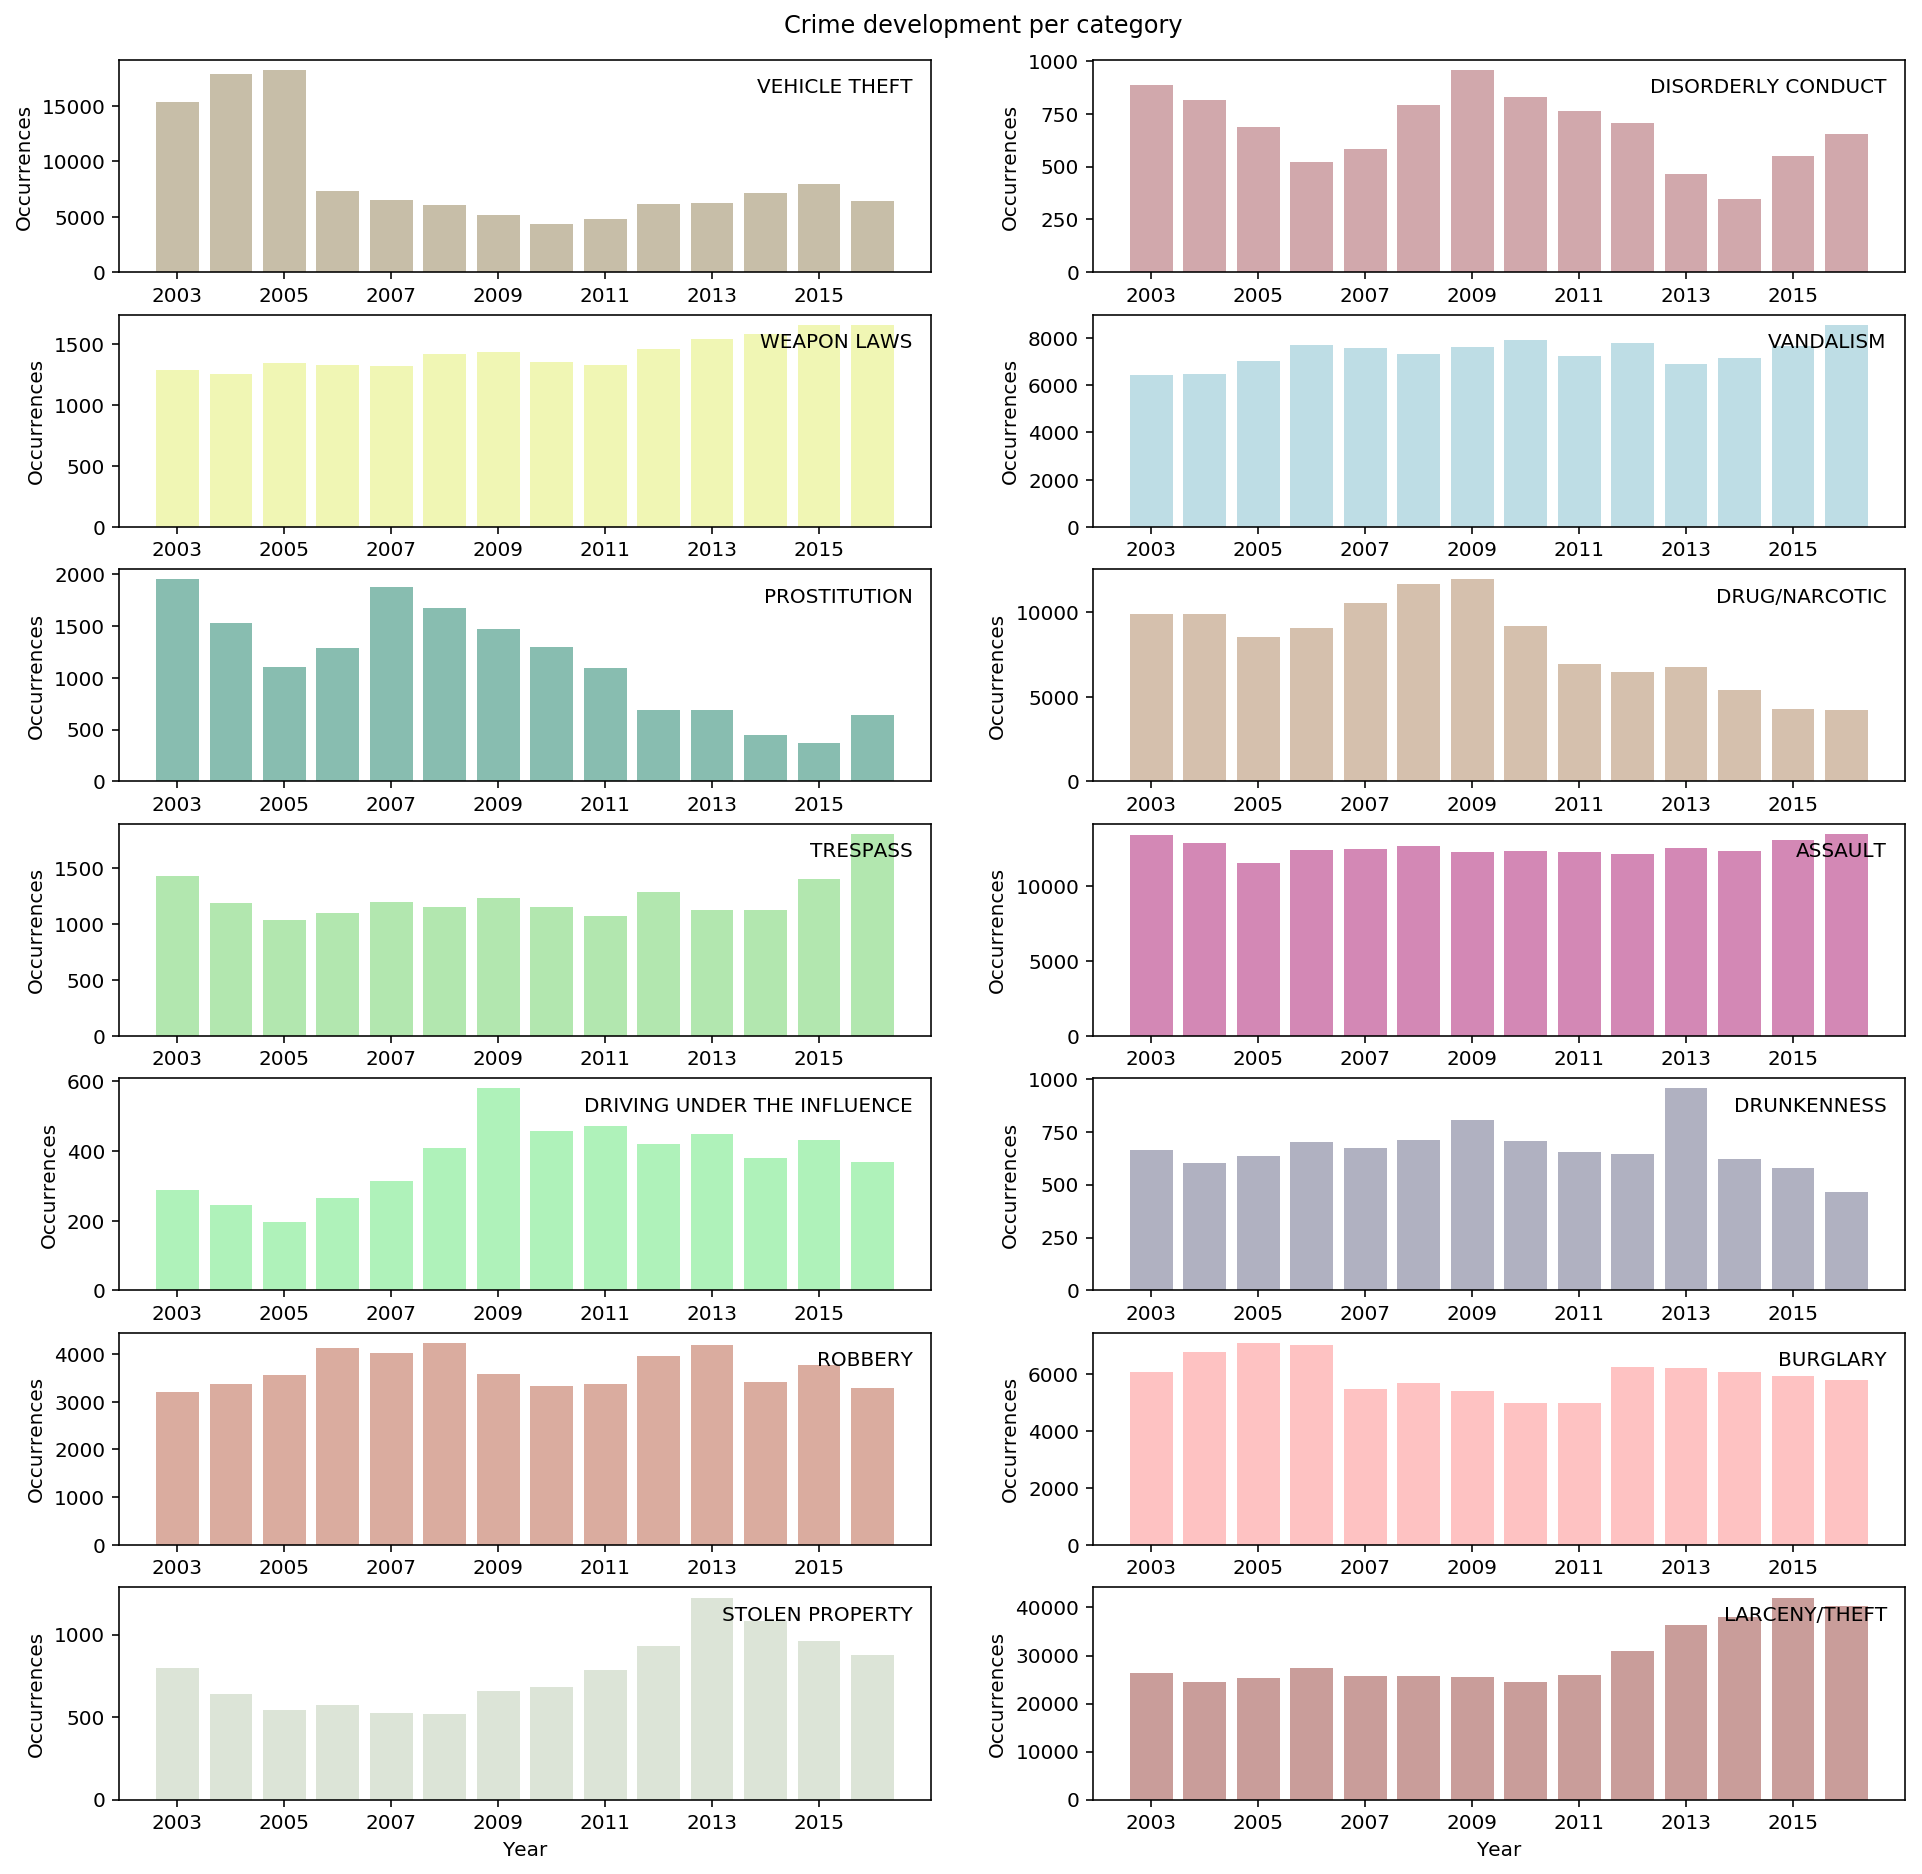

In [5]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

df_focus = df.filter(items=["Category", "Year"])
df_focus = df_focus[df_focus["Category"].isin(focuscrimes)]

plt.figure(figsize = (16,16))
plt.suptitle('Crime development per category', y=0.9)
for i, crime in enumerate(focuscrimes):
    # Create a matrix of subplots with 7 rows and two columns
    plt.subplot(7,2,i+1)
    
    df_focus_crime = df_focus[df_focus["Category"] == crime]
    df_focus_crime = df_focus_crime.drop('Category', axis=1) # axis=1 means column
    df_focus_crime = df_focus_crime[df_focus_crime["Year"] != 2017]
    
    crime_occurrencies = df_focus_crime.groupby('Year')['Year'].count().reset_index(name='Count').sort_values(by='Year', ascending=True)
    x = crime_occurrencies["Year"]
    y = crime_occurrencies["Count"]
    
    plt.bar(x, y, align='center', alpha=.5, color=np.random.rand(3,1), label=crime)
    plt.xticks(np.arange(2003,2016,2))
    plt.ylabel("Occurrences")
    plt.xlabel("Year")
    plt.legend(loc='upper right',frameon=False,handlelength=0, handletextpad=0)
plt.show()

## 2.2 Types of crime and their popularity across the 24 hours of the day
* First, plot a simple histogram of the number of crimes per hour in the dataset. There's a little strange peak at 12:00 - what do you think is going on there?

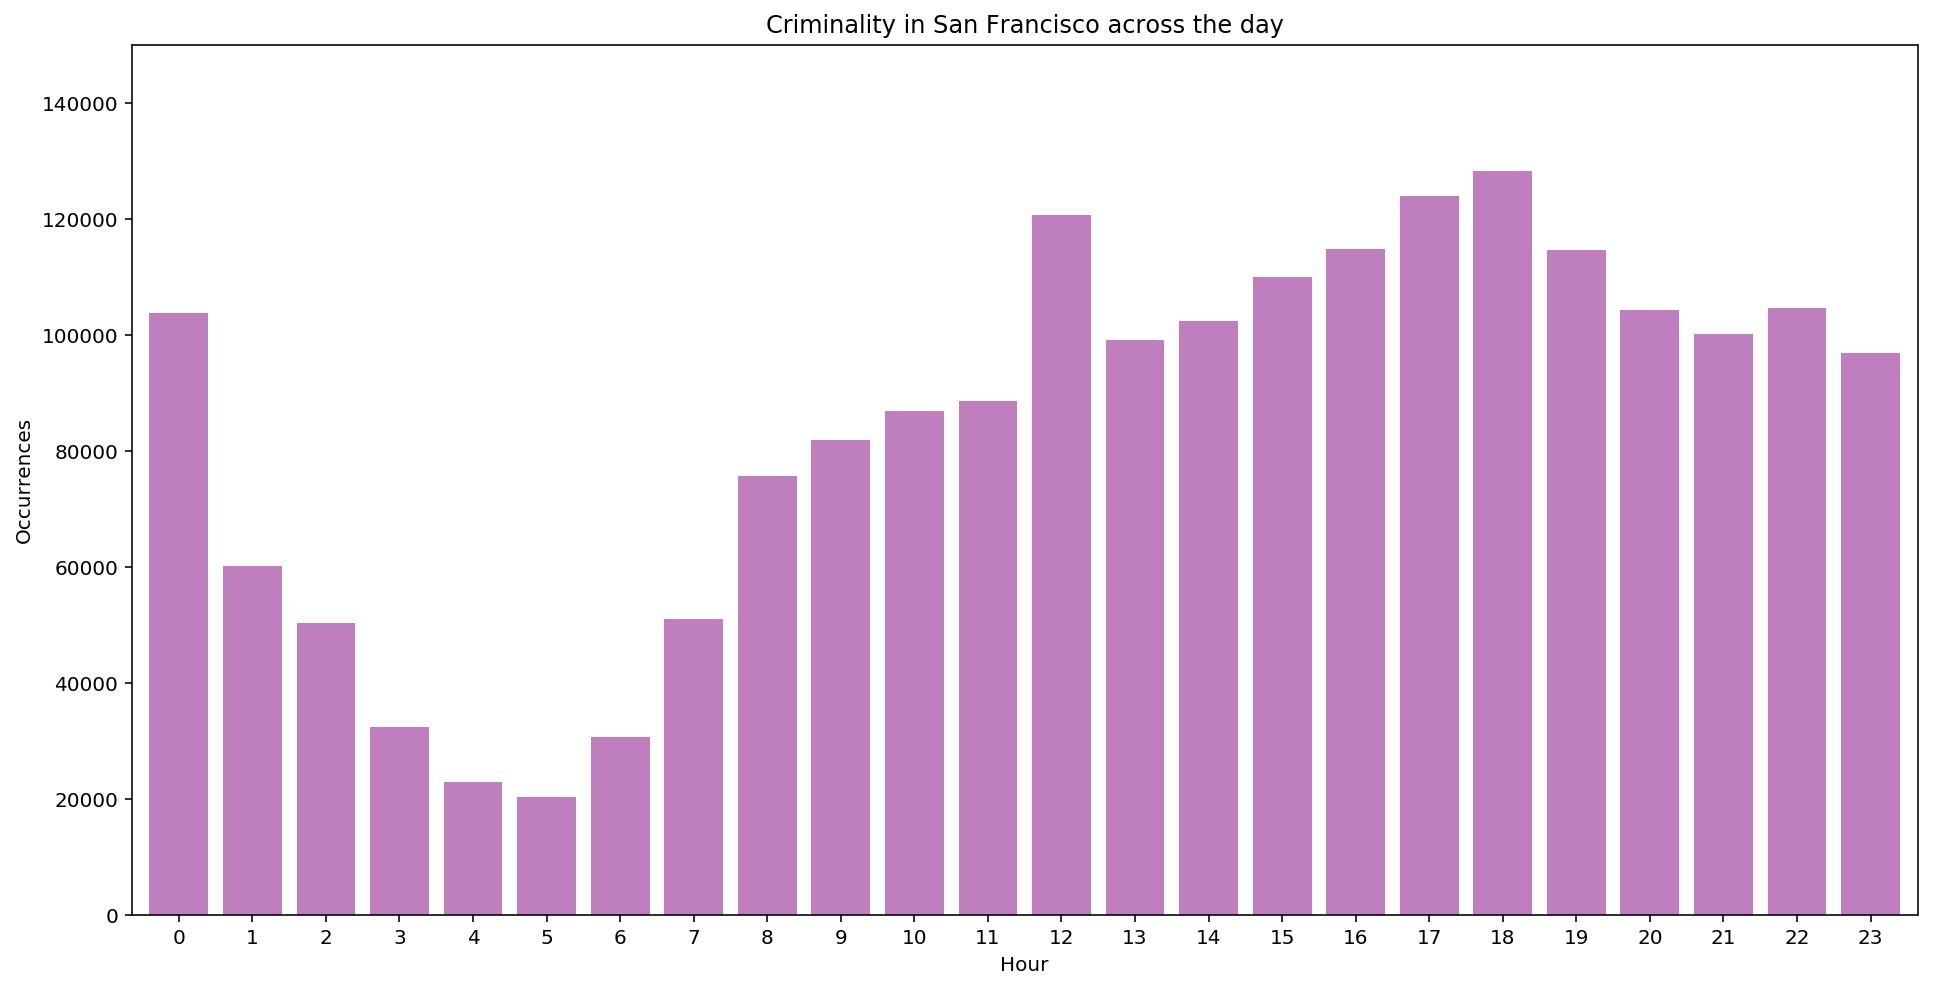

In [6]:
def get_hour(time):
    return int(time.split(":")[0])

df["Hour"] = df["Time"].apply(lambda x: get_hour(x))
df_hour_occurrences = df.groupby('Hour')['Hour'].count().reset_index(name='Occurrences')

categories_names = list(df_category_occurrences["Category"])
y = df_hour_occurrences["Occurrences"]
x = df_hour_occurrences["Hour"]

plt.figure(figsize=(16,8))
plt.bar(x,y,alpha=.5,color='purple',align='center')
plt.xticks(x)
plt.title("Criminality in San Francisco across the day")
plt.xlabel('Hour')
plt.ylabel("Occurrences")
plt.margins(0.01,0)
plt.ylim(0,150000)
plt.show()

* Next create a plot of the count of each crime category across the 24 hours of the day.

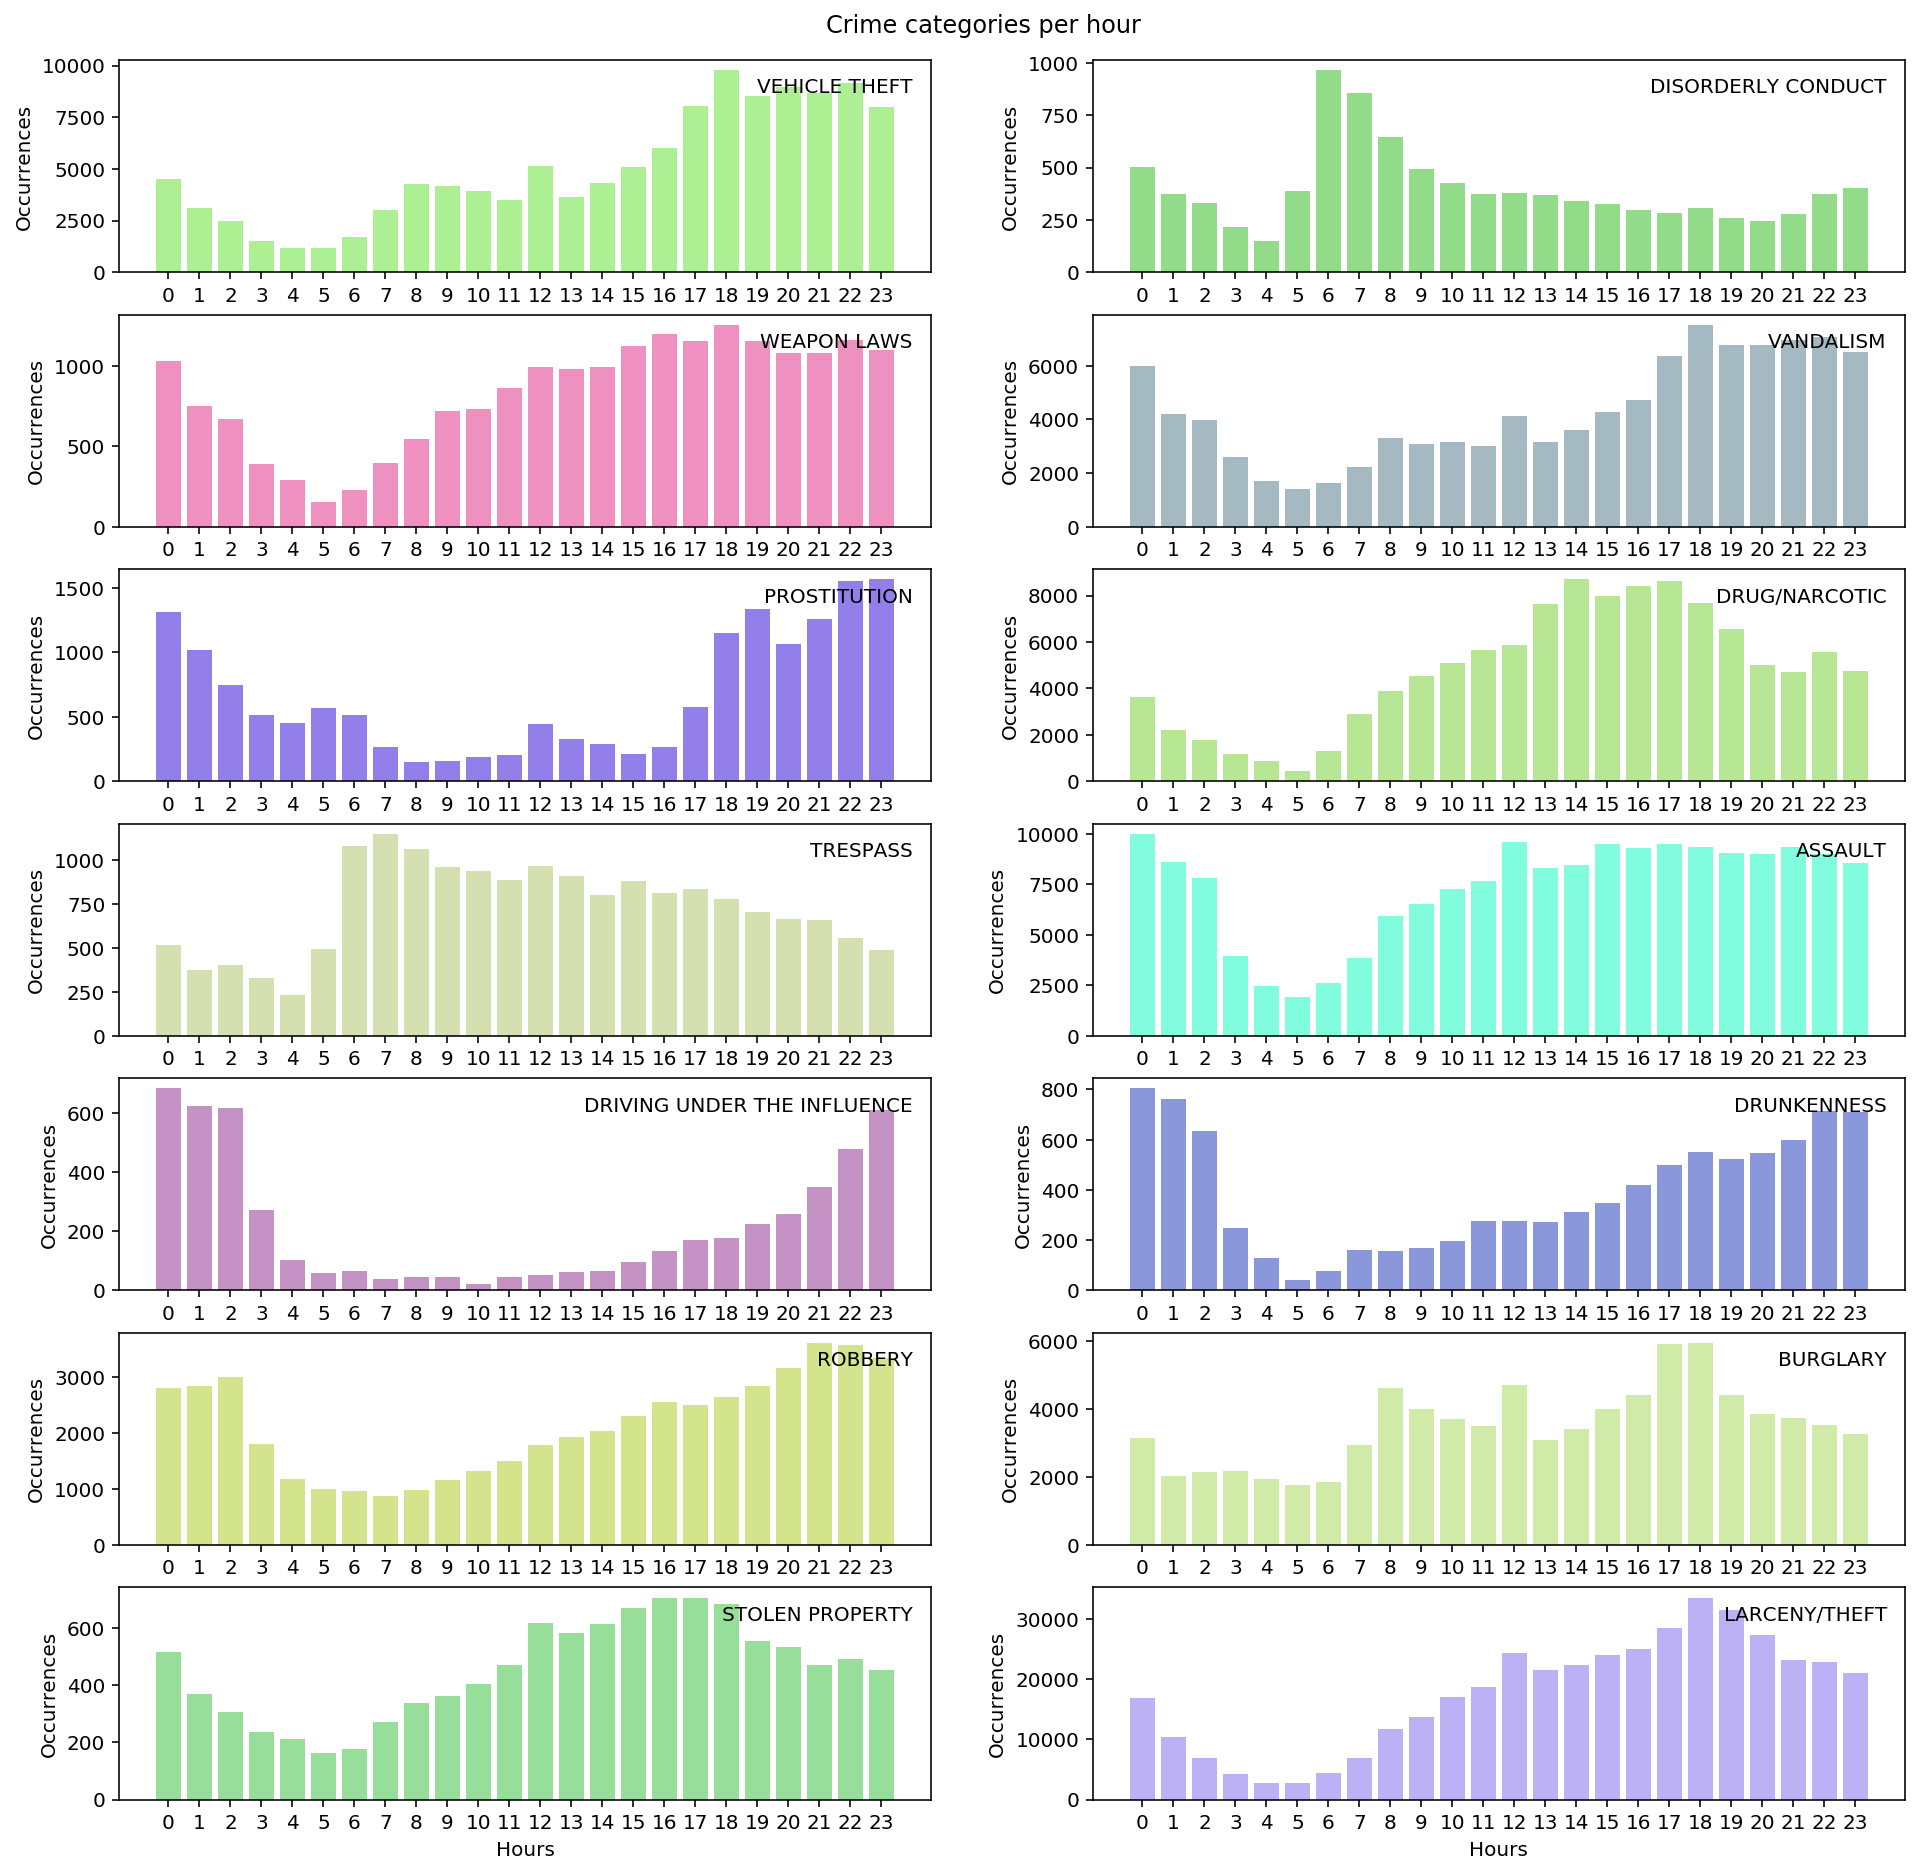

In [7]:
df_focus = df.filter(items=["Category", "Hour"])
df_focus = df_focus[df_focus["Category"].isin(focuscrimes)]

plt.figure(figsize = (16,16))
plt.suptitle('Crime categories per hour', y=0.9)
for i, crime in enumerate(focuscrimes):
    # Create a matrix of subplots with 7 rows and two columns
    plt.subplot(7,2,i+1)
    
    df_focus_hour = df_focus[df_focus["Category"] == crime]
    df_focus_hour = df_focus_hour.drop('Category', axis=1) # axis=1 means column
    
    df_hour_occurrences = df_focus_hour.groupby('Hour')['Hour'].count().reset_index(name='Count').sort_values(by='Hour', ascending=True)
    x = df_hour_occurrences["Hour"]
    y = df_hour_occurrences["Count"]
    
    plt.bar(x, y, align='center', alpha=.5, color=np.random.rand(3,1), label=crime)
    plt.xticks(x)
    plt.ylabel("Occurrences")
    plt.xlabel("Hours")
    plt.legend(loc='upper right',frameon=False,handlelength=0, handletextpad=0)
plt.show()

## 2.3: Crimes across police districts
* So now we'll be combining information about PdDistrict and Category to explore differences between SF's neighborhoods. First, simply list the names of SF's 10 police districts.
* Which has the most crimes? Which has the most focus crimes?

In [8]:
districts = [district for district in df["PdDistrict"].unique() if pd.notnull(district) ]
print districts

df_district_occurrences = df.groupby('PdDistrict')['PdDistrict'].count().reset_index(name='Crimes occurrences').sort_values(by='PdDistrict', ascending=True)
display(df_district_occurrences.head(3))

df_focus = df.filter(items=["Category", "PdDistrict"])
df_focus = df_focus[df_focus["Category"].isin(focuscrimes)]
df_focus_district_occurrences = df_focus.groupby('PdDistrict')['PdDistrict'].count().reset_index(name='Focus crimes occurrences').sort_values(by='PdDistrict', ascending=True)
display(df_focus_district_occurrences.head(3))

['MISSION', 'TENDERLOIN', 'NORTHERN', 'RICHMOND', 'BAYVIEW', 'CENTRAL', 'PARK', 'TARAVAL', 'SOUTHERN', 'INGLESIDE']


,PdDistrict,Crimes occurrences
0,BAYVIEW,203841
1,CENTRAL,202342
2,INGLESIDE,179593


,PdDistrict,Focus crimes occurrences
0,BAYVIEW,107768
1,CENTRAL,125981
2,INGLESIDE,99683


Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes that happen much more in certain neighborhoods than what's typical.
* First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole. That's simply a normalized version of this plot. Let's call it P(crime).
* Next, we calculate that same probability distribution but for each PD district, let's call that P(crime|district).
* Now we look at the ratio P(crime|district)/P(crime). That ratio is equal to 1 if the crime occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the crime occurs more frequently within that district. If it's smaller than one, it means that the crime is rarer within the district in question than in the city as a whole.
* For each district plot these ratios for the 14 focus crimes.

In [9]:
df_category_occurrences["P(crime)"] = df_category_occurrences["Occurrences"] / df_category_occurrences["Occurrences"].sum()
#display(df_category_occurrences.head())

df_district_occurrences["P(district)"] = df_district_occurrences["Crimes occurrences"] / df_district_occurrences["Crimes occurrences"].sum()
#display(df_district_occurrences.head())

df_category_district_occurrences = df.filter(["Category", "PdDistrict"]).groupby(["Category", "PdDistrict"]).size().reset_index(name="Occurrences")
df_category_district_occurrences["P(crime, district)"] = df_category_district_occurrences["Occurrences"] / df_category_district_occurrences["Occurrences"].sum()
#display(df_category_district_occurrences.head())

df_merged = pd.merge(df_category_district_occurrences.filter(['Category','PdDistrict','P(crime, district)']),
                     df_district_occurrences.filter(['PdDistrict','P(district)']),
                     on="PdDistrict")
df_merged["P(crime|district)"] = df_merged["P(crime, district)"] / df_merged["P(district)"]

df_merged = pd.merge(df_merged, df_category_occurrences.filter(['Category','P(crime)']), on="Category")

df_merged["Ratio"] = df_merged["P(crime|district)"] / df_merged["P(crime)"]
display(df_merged.head())

,Category,PdDistrict,"P(crime, district)",P(district),P(crime|district),P(crime),Ratio
0,ARSON,BAYVIEW,0.000450,0.100719,0.004469,0.001741,2.566684
1,ARSON,CENTRAL,0.000124,0.099978,0.001236,0.001741,0.709577
2,ARSON,INGLESIDE,0.000209,0.088738,0.002355,0.001741,1.352685
3,ARSON,MISSION,0.000185,0.135081,0.001372,0.001741,0.787772
4,ARSON,NORTHERN,0.000172,0.122039,0.001409,0.001741,0.809177


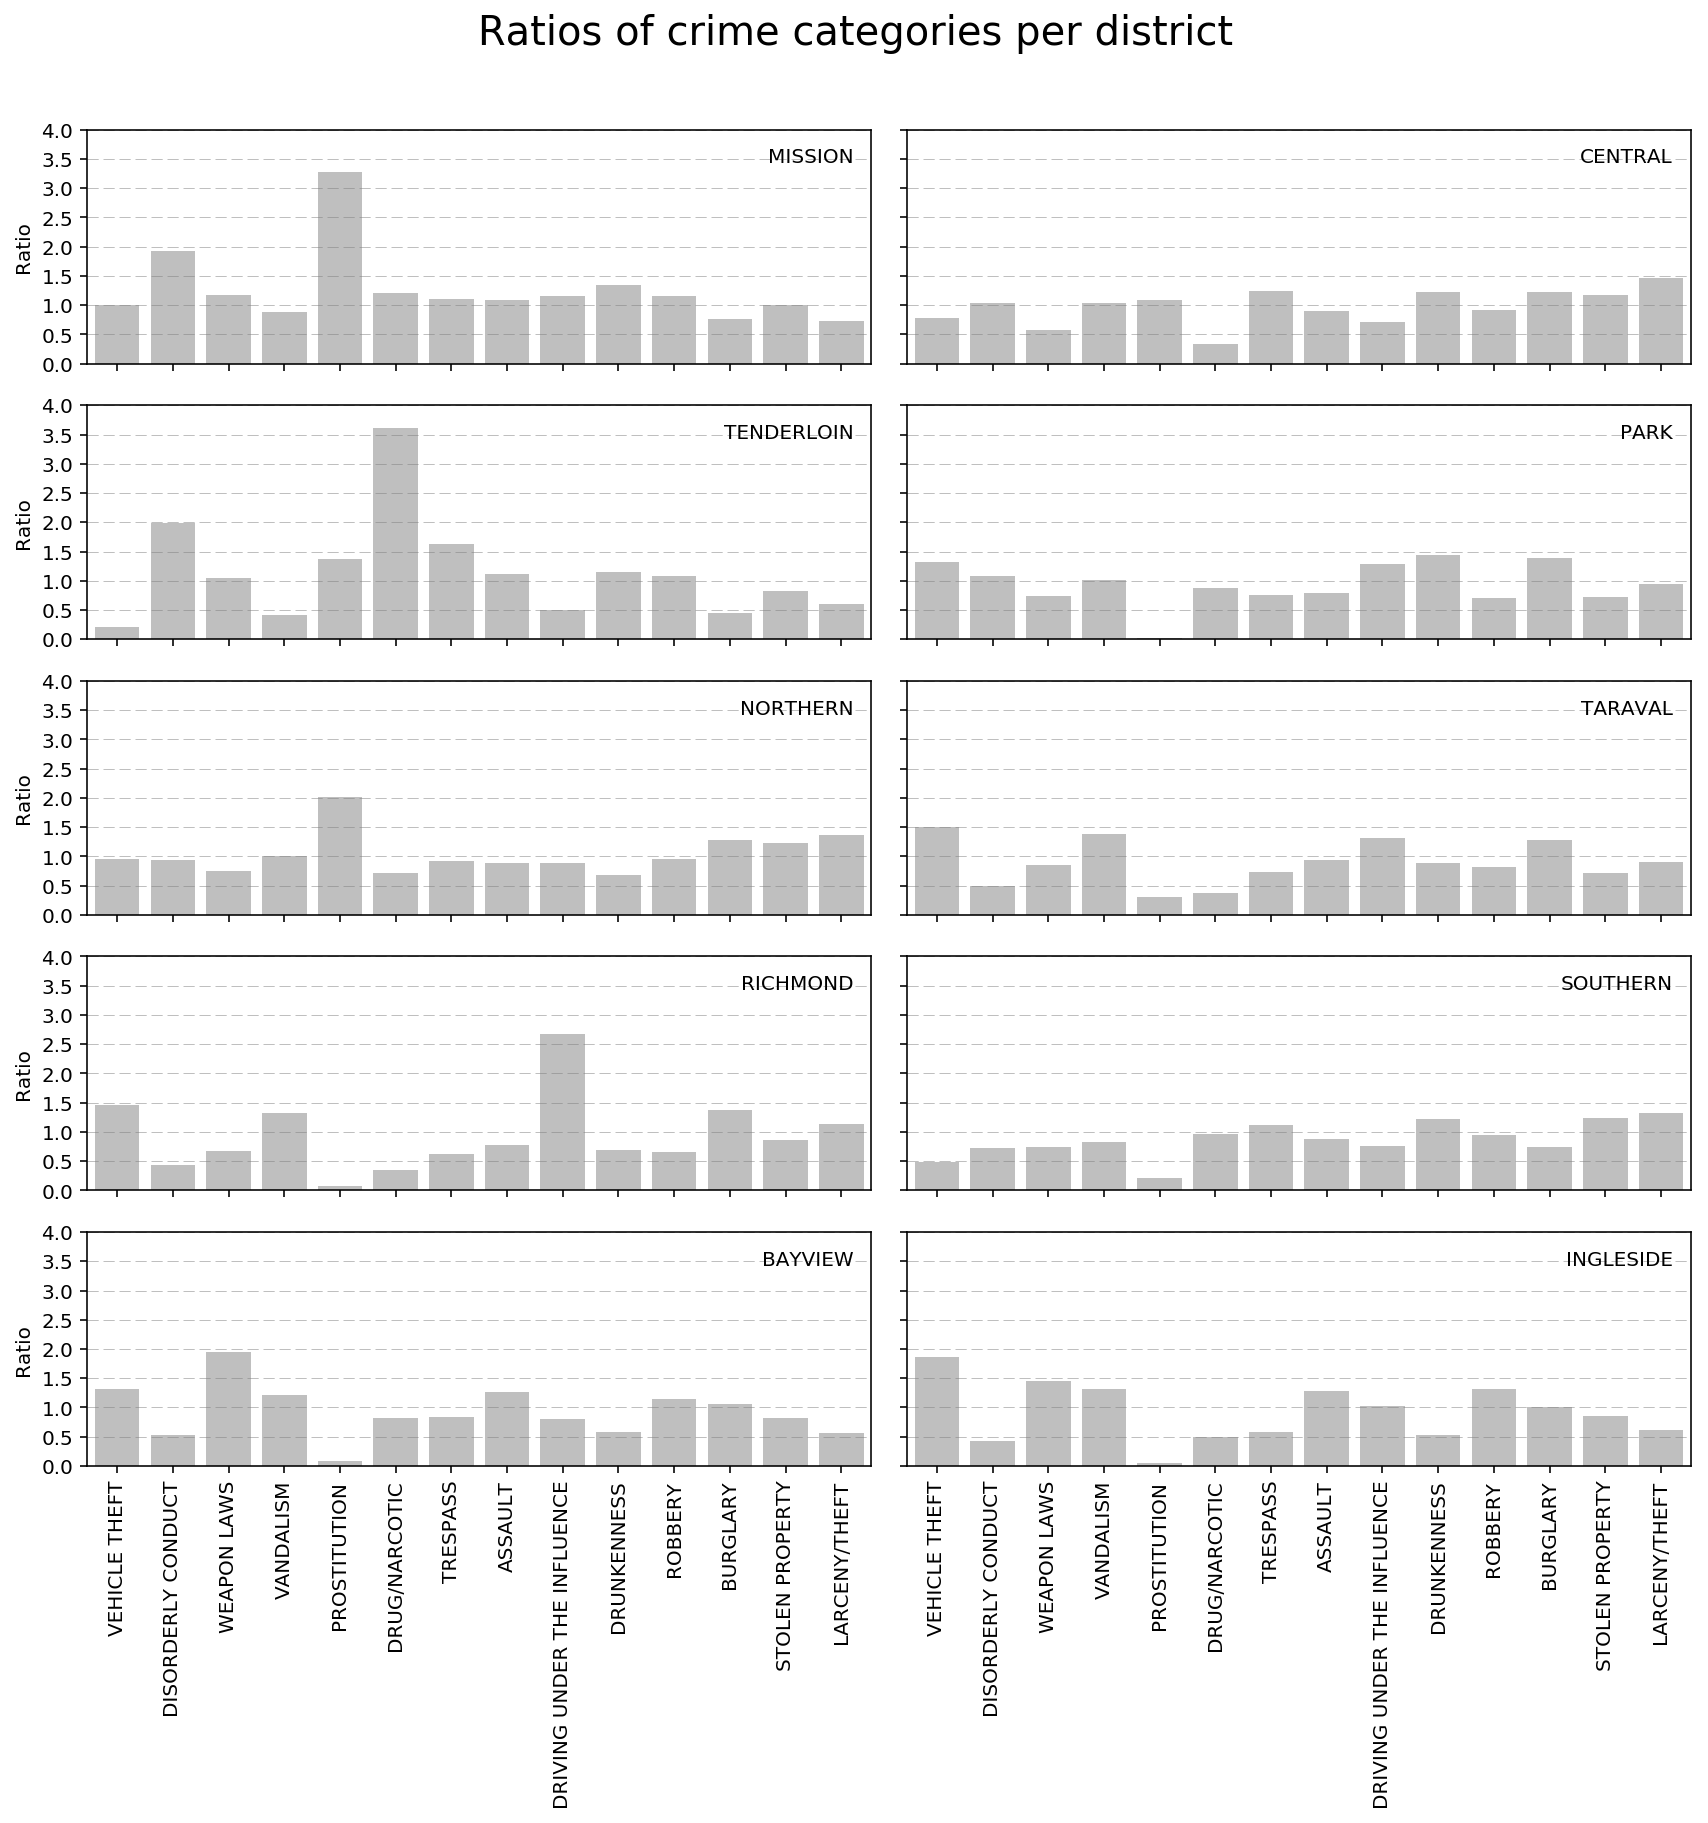

In [10]:
df_merged_focus = df_merged[df_merged["Category"].isin(focuscrimes)]

# Assign variables to axes and figure
fig, ax = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(12, 12))

# Assign the size and the Super title
fig.suptitle('Ratios of crime categories per district', fontsize=20, y=1.05)

for index,district in enumerate(districts):
    # Create a sub-df for each category
    temp_df3 = df_merged_focus[df_merged_focus['PdDistrict']==district]
    
    # Drop columns to minimize the memory usage(optional)
    temp_df3 = temp_df3.drop(['PdDistrict','P(crime)','P(crime|district)'], axis=1) # axis=1 means column
    
    # Assign x
    x = list(focuscrimes)
    # Give indeces to crimes
    x_pos = np.arange(len(x))
    
    # Assign y and keep the same sorting for each plot
    mapping = {crime:i for i,crime in enumerate(x)}
    key = temp_df3['Category'].map(mapping)
    temp_df3 = temp_df3.iloc[key.argsort()]
    y = temp_df3['Ratio']
    
    # Assign x and y to subplots                   
    subindex = 0
    # Index < 5 means left column else right column
    if index < 5:
        final_index = index
        final_subindex = subindex
    else:
        final_index = index - 5
        final_subindex = subindex + 1
    
    # Create an ax object
    ax_temp =  ax[final_index][final_subindex]
    
    # Create a series of grey dashed lines across the each
    # labled y-value of the graph
    ax_temp.grid(axis='y',color='grey', linestyle='--', lw=0.5, alpha=0.5)  
    # Feed the ax object with the x and y values
    ax_temp.bar(x_pos,y,align='center',alpha=.5, color='grey',label=district)
    ax_temp.legend(loc='upper right',frameon=False,handlelength=0, handletextpad=0)
    ax_temp.margins(0.01)
    
    # Set the rotation to vertical
    for tick in ax_temp.get_xticklabels():
        tick.set_rotation(90)
    # Set Ratio label only in the left column
    if index < 5:
        ax_temp.set_ylabel("Ratio")
            
    # Set xticks and yticks parameters
    plt.setp(ax, xticks=x_pos, xticklabels=x,yticks=np.arange(0,4.5,0.5)) 
# Show the barplot
fig.tight_layout()
plt.show()

# Part 4: A little bit of plotting
* Create a kernel density map plot of all crimes from the CSV file.

In [11]:
import geoplotlib
from geoplotlib.utils import BoundingBox
from geoplotlib.colors import ColorMap

lats = [float(el) for el in list(df['X'])]
longs = [float(el) for el in list(df['Y'])]

geo_data_for_plotting = {"lat": lats,
                         "lon": longs}

print 'Latitudes:',set([round(el) for el in lats])
print 'Longitudes:',set([round(el) for el in longs])

Latitudes: set([-123.0, -122.0, -121.0])
Longitudes: set([90.0, 38.0])


In [13]:
geo_data_for_plotting = {"lat": [float(el) for el in list(df[df['Y']!=90.0]['Y'])],
                         "lon": [float(el) for el in list(df[df['Y']!=90.0]['X'])]}

#Ready for plotting
geoplotlib.kde(geo_data_for_plotting, bw=[5,5], cmap='hot', cut_below=1e-4)
geoplotlib.tiles_provider('toner')
bbox = BoundingBox(north=max(longs),
                   west=min(lats),
                   south=min(lats),
                   east=max())
geoplotlib.set_bbox(bbox)
geoplotlib.tiles_provider('watercolor')
geoplotlib.inline()
#geoplotlib.show()

Traceback (most recent call last):
  File "/Users/lucacambiaghi/anaconda2/lib/python2.7/site-packages/geoplotlib/__init__.py", line 32, in _runapp
    app.start()
  File "/Users/lucacambiaghi/anaconda2/lib/python2.7/site-packages/geoplotlib/core.py", line 362, in start
    self.proj.fit(self.geoplotlib_config.bbox, force_zoom=self.geoplotlib_config.requested_zoom)
  File "/Users/lucacambiaghi/anaconda2/lib/python2.7/site-packages/geoplotlib/core.py", line 677, in fit
    west_tile, north_tile = self.deg2num(bbox.north, bbox.west, self.zoom)
  File "/Users/lucacambiaghi/anaconda2/lib/python2.7/site-packages/geoplotlib/core.py", line 689, in deg2num
    ytile = (1.0 - math.log(math.tan(lat_rad) + (1 / math.cos(lat_rad))) / math.pi) / 2.0 * n
ValueError: math domain error
